<a href="https://www.kaggle.com/code/daesunryu/small-eda-find-interesting-insight?scriptVersionId=95272213" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Set up
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# What do i want to analyze?
###### Only European League will be considered
> * **Top 5 highst goal score (2016 ~ 2020)**
    * viz - line chart: To see the performance of the players who are in top 5 Goal Score
    over the years
    
> * **Who has the highst xG value (2016~2020)**
    * viz - bar chart: comparing with other 5 most top players
    
    


In [2]:
df= pd.read_csv("../input/top-football-leagues-scorers/Data.csv")

In [3]:
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


In [4]:
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [5]:
# Who has the most goals ever
df['Goals'].max()
df[["Player Names", "Goals", "Year"]][df["Goals"] == 37]
# messi 37 Goals

,Player Names,Goals,Year
12,Lionel Messi,37,2016


In [6]:
# Top 5 Goal Score (2016 ~ 2020)
df.groupby('Goals')['Goals'].count()
# 37, 36, 34, 33, 31 Goals are the highst ever 

df[["Player Names", "Goals", "Year", "Club", "League"]][df['Goals'] == 36]
# Immobile 36 Goals
# except Messi(already top 1 with 37 goals) and Vela (USA League will be not considered..)

df[["Player Names", "Goals", "Year"]][df['Goals'] == 34]
# Lewandowski 34 Goals

df[["Player Names", "Goals", "Year"]][df['Goals'] == 33]
# Mbappe 33 Goals

df[["Player Names", "Goals", "Year", "Club"]][df['Goals'] == 31]
# Aubameyang, Zlatan, Ronaldo 31 Goals

# top1 Lionel Messi
# top2 Ciro Immobile
# top3 Robert Lewandowski
# top4 Kylian Mbappe-Lottin
# top5 Pierre-Emerick Aubameyang, Zlatan Ibrahimovic, Cristiano Ronaldo

,Player Names,Goals,Year,Club
54,Pierre-Emerick Aubameyang,31,2016,(ARS)
302,Zlatan Ibrahimovic,31,2019,(ACM)
385,Cristiano Ronaldo,31,2019,(JUV)


<AxesSubplot:xlabel='Year', ylabel='Goals'>

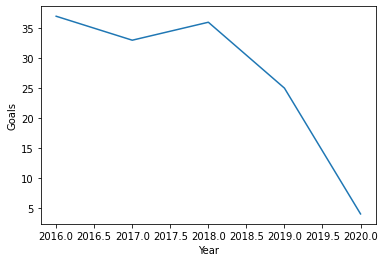

In [7]:
messi = df[df.loc[:, "Player Names"] == "Lionel Messi"]
sns.lineplot(data=df, x=messi["Year"], y=messi["Goals"])
# Legend never dies? Legend can die

<AxesSubplot:xlabel='Year', ylabel='Goals'>

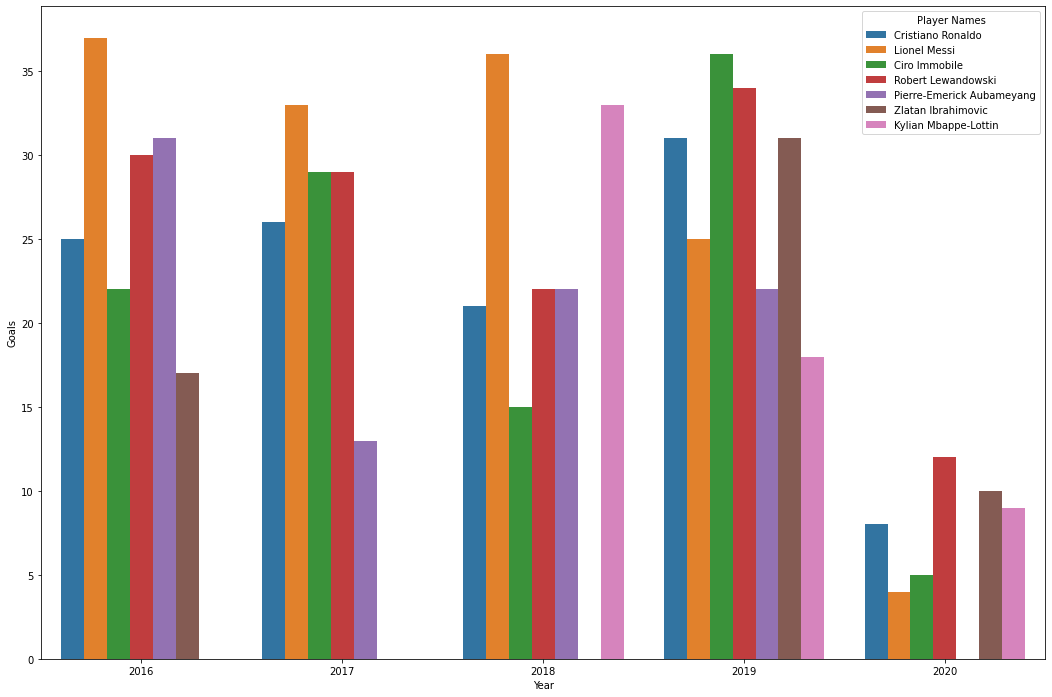

In [8]:
# Top 5 highst goal score (2016 ~ 2020)
top5_goals_players_list = ["Lionel Messi", "Ciro Immobile", "Robert Lewandowski", "Kylian Mbappe-Lottin", "Pierre-Emerick Aubameyang", "Zlatan Ibrahimovic", "Cristiano Ronaldo"]
top5_goals_players = df[df["Player Names"].isin(top5_goals_players_list)]

plt.figure(figsize=(18, 12))
sns.barplot(data=df, x=top5_goals_players["Year"], y=top5_goals_players["Goals"], hue=top5_goals_players["Player Names"])

#### The latest best player is lewandoski.
#### Messi is dying but ronaldo is being better than messi.
#### And it seems like zlatan got injured for 2 years (2017, 2018).
#### There is such a huge decrease from 2019 to 2020,(Because of COVID-19?)

Text(0, 0.5, 'xG Value')

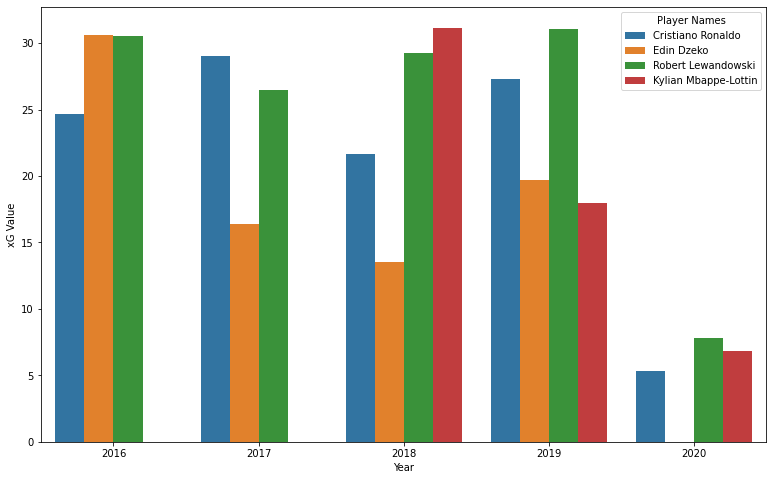

In [9]:
# Who has the highst xG value (2016~2020)
df.sort_values(by='xG', ascending=False).head(10)
top5_xG_list = ["Lieonel Messi", "Kylian Mbappe-Lottin", "Robert Lewandowski", "Edin Dzeko", "Cristiano Ronaldo"]
top5_xG = df[df.loc[:, "Player Names"].isin(top5_xG_list)]

plt.figure(figsize=(13, 8))
sns.barplot(data=df, x=top5_xG["Year"], y=top5_xG["xG"], hue=top5_xG["Player Names"])
plt.ylabel("xG Value")

### It makes sense that lewandowski has the highst xG value at 2020